In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import matplotlib as mpl

In [2]:

Lr = [1E7, 1E8, 1E9, 1E10,]


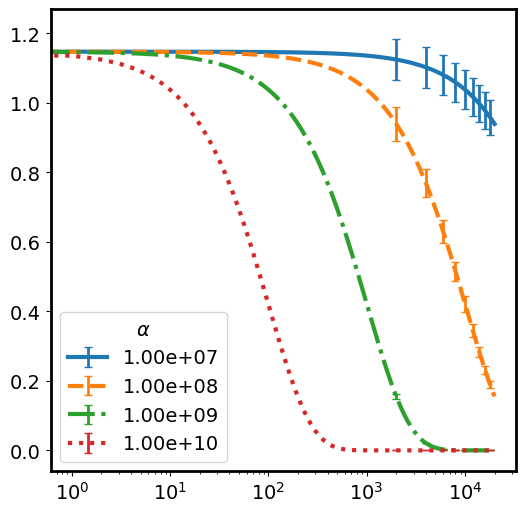

In [3]:
Data = pd.DataFrame(columns=['lr', 'Loss', 'VSeed'], dtype=np.float64)

plt.figure(figsize=(6, 6))
mpl.rcParams['axes.linewidth'] = 2 #set the value globally
mpl.rcParams['font.size'] = 14
lss = ['-', '--', '-.', ':']
# plt.yscale('log') 
plt.xscale('log')

for lr in Lr:
    loss = np.zeros((10, 20000))
    for n in range(10):
        try:
            pth = '../log/Harmonic_Piezo_TrussNe:8/m:0.001/k:10000.0/omega:10/xi:0.2/gamma:0.0001/C:1e-07/W_seed:0/G_seed:0/C_seed:0/V_seed:{}/lr:{}/Vr:10/Vi:1/Ep:20000/Vm:0.0/A:1e-06/angle:0/'.format(n, lr)
            pth += os.listdir(pth)[0]
            data = np.load(pth+'/loss.npz')['loss']
            loss[n] = data
        except:
            # print(pth)
            pass
    mean_loss = np.mean(loss, axis=0)
    std_loss = np.std(loss, axis=0)
    plt.errorbar(np.arange(20000), mean_loss, yerr=std_loss, label='{:.2e}'.format(lr),errorevery=2000, ls=lss[Lr.index(lr)], capsize=3, elinewidth=2, markeredgewidth=1, linewidth=3)
    
plt.legend(title=r'$\alpha$', fontsize=14)
plt.show()`
        